<h1>1. Import necessary libraries<h1>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import necessary sklearn libraries
from sklearn.linear_model import LogisticRegression
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

<h3>2. Preparing dataset for the classification model<h3>

In [3]:
gender_train = pd.read_csv("data/gender_train.csv")
tr_data_sum_amount_by_mcc = pd.read_csv("data/df_sum_amount_by_mcc.csv", index_col='customer_id')
tr_data_sum_amount_by_mcc.head()

,amount_in_mcc_742,amount_in_mcc_1711,amount_in_mcc_1731,amount_in_mcc_1799,amount_in_mcc_3000,amount_in_mcc_3351,amount_in_mcc_3501,amount_in_mcc_4121,amount_in_mcc_4131,amount_in_mcc_4214,...,amount_out_mcc_8043,amount_out_mcc_8062,amount_out_mcc_8071,amount_out_mcc_8244,amount_out_mcc_8398,amount_out_mcc_8699,amount_out_mcc_9211,amount_out_mcc_9222,amount_out_mcc_9311,amount_out_mcc_9399
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22899,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27914,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28753,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31385,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print('Size of the dataset : {}'.format(tr_data_sum_amount_by_mcc.shape))

Size of the dataset : (13407, 246)


In [5]:
# Making a train dataset for the model
gender_train = gender_train.set_index('customer_id')
data_train = pd.merge(tr_data_sum_amount_by_mcc, gender_train,
                                  how='inner', on="customer_id").fillna(0)
print('Size of the first model train dataset : {}'.format(data_train.shape))
data_train.head()

Size of the first model train dataset : (7475, 247)


,amount_in_mcc_742,amount_in_mcc_1711,amount_in_mcc_1731,amount_in_mcc_1799,amount_in_mcc_3000,amount_in_mcc_3351,amount_in_mcc_3501,amount_in_mcc_4121,amount_in_mcc_4131,amount_in_mcc_4214,...,amount_out_mcc_8062,amount_out_mcc_8071,amount_out_mcc_8244,amount_out_mcc_8398,amount_out_mcc_8699,amount_out_mcc_9211,amount_out_mcc_9222,amount_out_mcc_9311,amount_out_mcc_9399,gender
customer_id,,,,,,,,,,,,,,,,,,,,,
22899,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
28753,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
42096,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
49793,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
50940,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
# Getting X, y from the model train dataset
X = data_train.drop(['gender'], axis=1)
y = data_train.gender
print('Size of the first model X : {}'.format(X.shape))
print('Size of the first model y : {}'.format(y.shape))

Size of the first model X : (7475, 246)
Size of the first model y : (7475,)


In [7]:
# Getting test dataset for the model
X_test = tr_data_sum_amount_by_mcc.loc[
     ~tr_data_sum_amount_by_mcc.index.isin(data_train.index.unique())]
print('Size of the first model X_test : {}'.format(X_test.shape))
X_test.head()

Size of the first model X_test : (5932, 246)


,amount_in_mcc_742,amount_in_mcc_1711,amount_in_mcc_1731,amount_in_mcc_1799,amount_in_mcc_3000,amount_in_mcc_3351,amount_in_mcc_3501,amount_in_mcc_4121,amount_in_mcc_4131,amount_in_mcc_4214,...,amount_out_mcc_8043,amount_out_mcc_8062,amount_out_mcc_8071,amount_out_mcc_8244,amount_out_mcc_8398,amount_out_mcc_8699,amount_out_mcc_9211,amount_out_mcc_9222,amount_out_mcc_9311,amount_out_mcc_9399
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27914,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31385,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38084,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49101,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Splitting dataset to the train and validation datasets:

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

<h3>3. XGBoost Classifier for classification model<h3>

Accuracy score on train set: 0.933
Accuracy score on valid set: 0.771


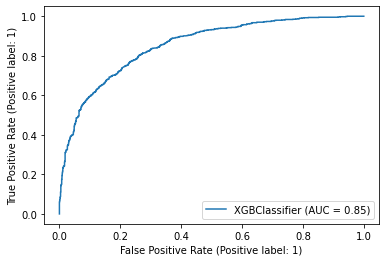

In [9]:
xgb = xgboost.XGBClassifier(eval_metric='auc', use_label_encoder=False,
                           objective='binary:logistic',
                           alpha = 1)
xgb.fit(X_train, y_train)
print("Accuracy score on train set: {:.3f}".format(xgb.score(X_train, y_train)))
print("Accuracy score on valid set: {:.3f}".format(xgb.score(X_valid, y_valid)))
plot_roc_curve(xgb, X_valid, y_valid);

In [10]:
# Range of parameters xgboost for GridSearch
alpha_xgb_GS_range = np.round(np.linspace(9, 10, 11),2)
xgb_parameters = {'alpha': alpha_xgb_GS_range}

In [11]:
ROC_AUC_scorer = make_scorer(roc_auc_score)
xgb_GS = GridSearchCV(scoring=ROC_AUC_scorer,
                     estimator=xgboost.XGBClassifier(eval_metric='auc', use_label_encoder=False,
                     objective='binary:logistic'),
                     param_grid=xgb_parameters, cv=5)

In [12]:
xgb_GS.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone...s=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                      

In [13]:
print("Best score: {}".format(xgb_GS.best_score_))
print("Best params: {}".format(xgb_GS.best_estimator_))

Best score: 0.7731255403709776
Best params: XGBClassifier(alpha=9.8, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=9.80000019, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)


Accuracy score on train set: 0.854
Accuracy score on valid set: 0.781


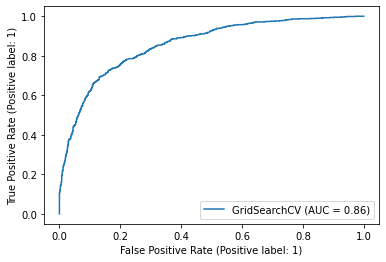

In [14]:
# XGBoost classifier third model with parameters found by GridSearchCV
print("Accuracy score on train set: {:.3f}".format(xgb_GS.score(X_train, y_train)))
print("Accuracy score on valid set: {:.3f}".format(xgb_GS.score(X_valid, y_valid)))
plot_roc_curve(xgb_GS, X_valid, y_valid);

It seems that we reach ROC AUC = 0.86 on the validation dataset with the best hyper-parameters found by GridSearchCV

<h3>4. Make the predictions<h3>

In [15]:
customers_for_sumbission = pd.read_csv("data/gender_test_kaggle_sample_submission.csv")

In [16]:
customers_for_sumbission.drop(['probability'], axis=1, inplace=True)

In [17]:
customers_for_sumbission.head()

,customer_id
0,75562265
1,84816985
2,54129921
3,23160845
4,45646491


In [18]:
X_test.shape

(5932, 246)

In [19]:
X_test.reset_index()
X_test_predictions = pd.merge(X_test,customers_for_sumbission,
                                    how='right', on="customer_id")

X_test_predictions.set_index('customer_id')
print('Size of submission dataset : {}'.format(X_test_predictions.shape))

Size of submission dataset : (3600, 247)


In [20]:
X_test_predictions.set_index('customer_id',inplace=True)

In [21]:
X_test_predictions.shape

(3600, 246)

In [22]:
X_test_predictions.head()

,amount_in_mcc_742,amount_in_mcc_1711,amount_in_mcc_1731,amount_in_mcc_1799,amount_in_mcc_3000,amount_in_mcc_3351,amount_in_mcc_3501,amount_in_mcc_4121,amount_in_mcc_4131,amount_in_mcc_4214,...,amount_out_mcc_8043,amount_out_mcc_8062,amount_out_mcc_8071,amount_out_mcc_8244,amount_out_mcc_8398,amount_out_mcc_8699,amount_out_mcc_9211,amount_out_mcc_9222,amount_out_mcc_9311,amount_out_mcc_9399
customer_id,,,,,,,,,,,,,,,,,,,,,
75562265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84816985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54129921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23160845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45646491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
xgb_GS.predict_proba(X_test_predictions)

array([[0.49470556, 0.50529444],
       [0.35404468, 0.6459553 ],
       [0.96439624, 0.03560377],
       ...,
       [0.6670227 , 0.3329773 ],
       [0.86456674, 0.13543324],
       [0.7199139 , 0.2800861 ]], dtype=float32)

In [25]:
test_predictions = pd.DataFrame({'customer_id':X_test_predictions.index,
                                       'probability':xgb_GS.predict_proba(X_test_predictions)[:,1]})
test_predictions.to_csv('predictions.csv', index=False)
test_predictions.shape

(3600, 2)